# CSE4502 Programming Assignment #1

## Follow chapter 2 of the textbook and finish the code as an end-to-end machine learning project

##Get the Data
Import necessary libraries and load the New York City Airbnb dataset.

In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("./AB_NYC_2019_1.csv")

###Take a Quick Look at the Data (10 points)
Using head(), info(), describe() to get a sense of the dataset.

Fill in your code below.

In [6]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Explore the categorical attributes in the dataset using value_counts().

Fill in your code below.

In [7]:
df["neighbourhood_group"].value_counts()

,count
neighbourhood_group,
Manhattan,21660
Brooklyn,20095
Queens,5666
Bronx,1090
Staten Island,373


Fill in code below.

In [8]:
df["room_type"].value_counts()

,count
room_type,
Entire home/apt,25407
Private room,22319
Shared room,1158


Fill in code below.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48884 entries, 0 to 48883
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48884 non-null  object 
 1   latitude                        48884 non-null  float64
 2   longitude                       48884 non-null  float64
 3   room_type                       48884 non-null  object 
 4   price                           48884 non-null  int64  
 5   minimum_nights                  48884 non-null  int64  
 6   number_of_reviews               48884 non-null  int64  
 7   reviews_per_month               38833 non-null  float64
 8   calculated_host_listings_count  48884 non-null  int64  
 9   availability_365                48884 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


Fill in code below.

In [10]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000
mean,40.728953,-73.952176,152.755053,7.029887,23.271991,1.373128,7.144628,112.779498
std,0.054532,0.046159,240.170260,20.512224,44.551331,1.680391,32.956185,131.627271
min,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723080,-73.955685,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763120,-73.936290,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


###Histogram (10 points)
Show the histogram of each feature to see the range of the values and distribution.

Fill in code below.

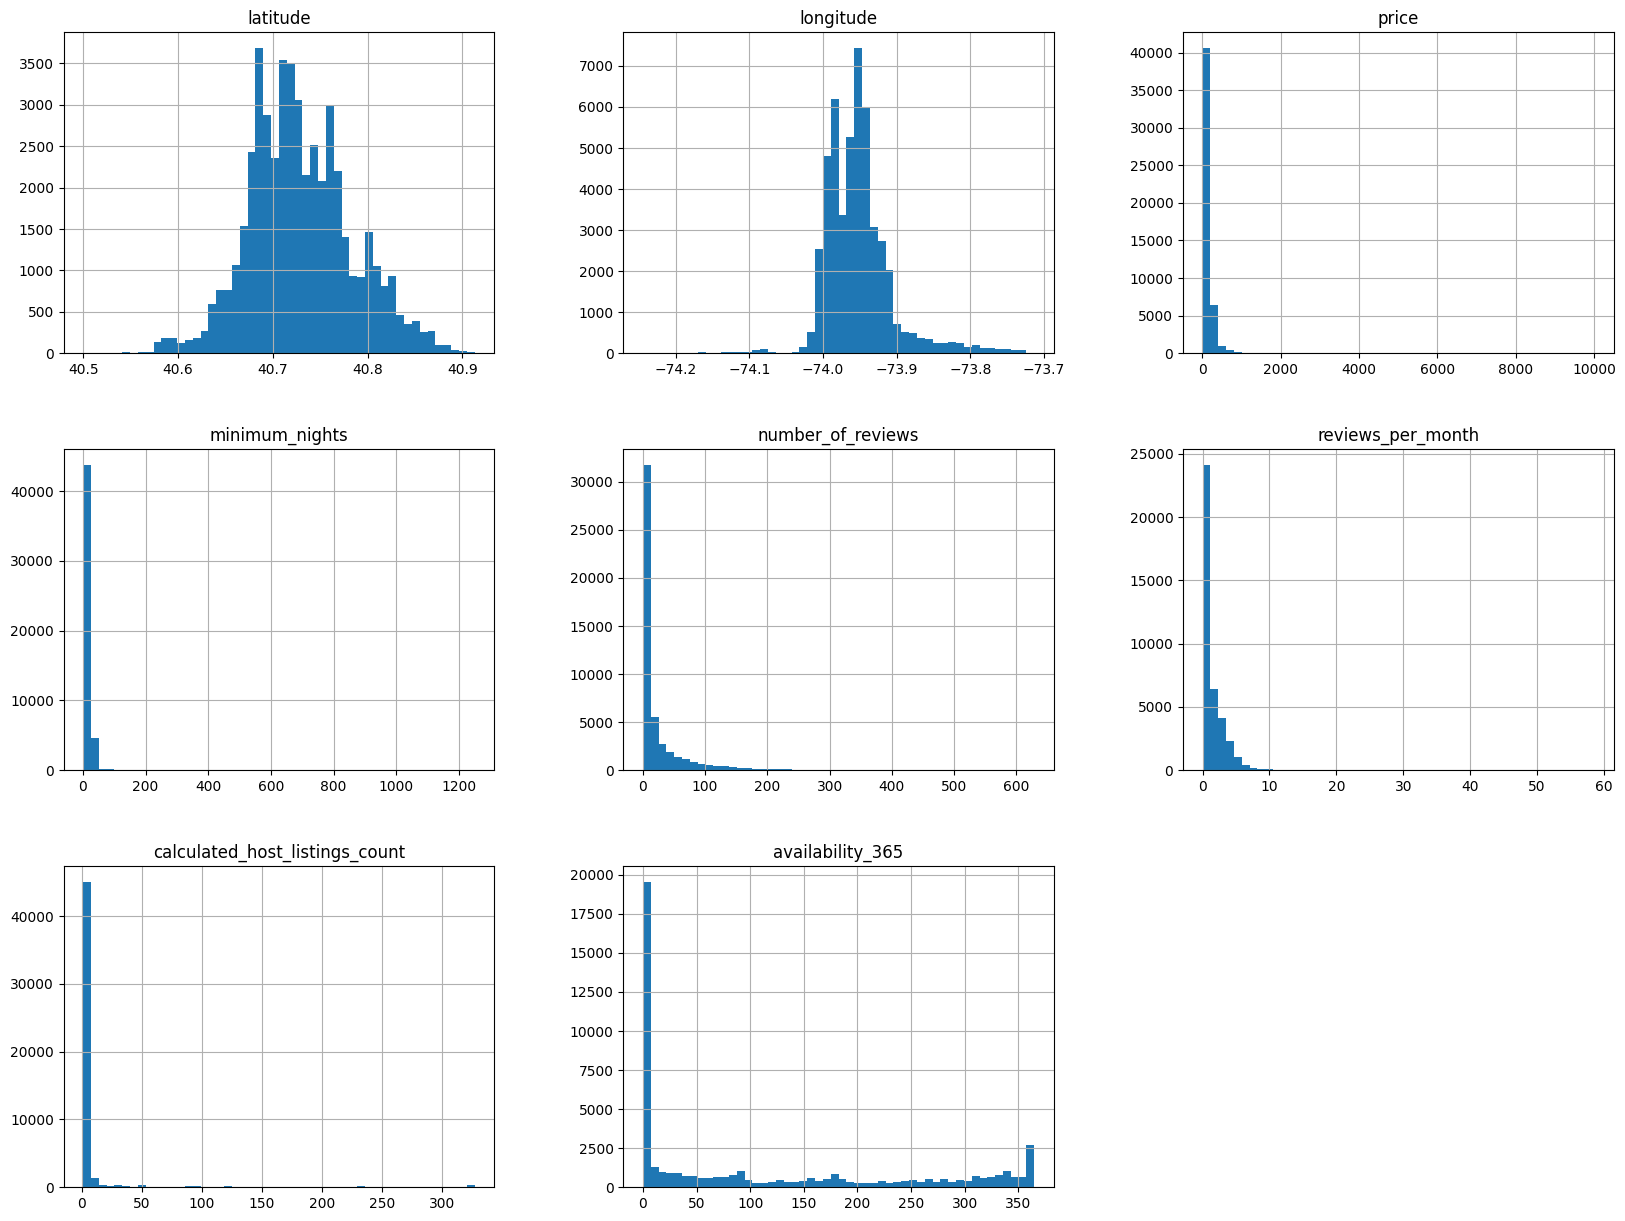

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

###Correlation matrix (10 points)
Understand the correlation of the various features with the price.

In [12]:
corr_matrix = df.corr(numeric_only = True)

Fill in your code below.

In [13]:
corr_matrix["price"].sort_values(ascending=False)

,price
price,1.000000
availability_365,0.081847
calculated_host_listings_count,0.057462
minimum_nights,0.042805
latitude,0.033899
reviews_per_month,-0.030575
number_of_reviews,-0.047926
longitude,-0.149954


We see that one feature is more correlated with price. It is longitude, which has a significant negative correlation with price. In the following, we will particularly look into the correlation.

Fill in your code below.

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='longitude', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='longitude'>,
        <Axes: xlabel='longitude', ylabel='longitude'>]], dtype=object)

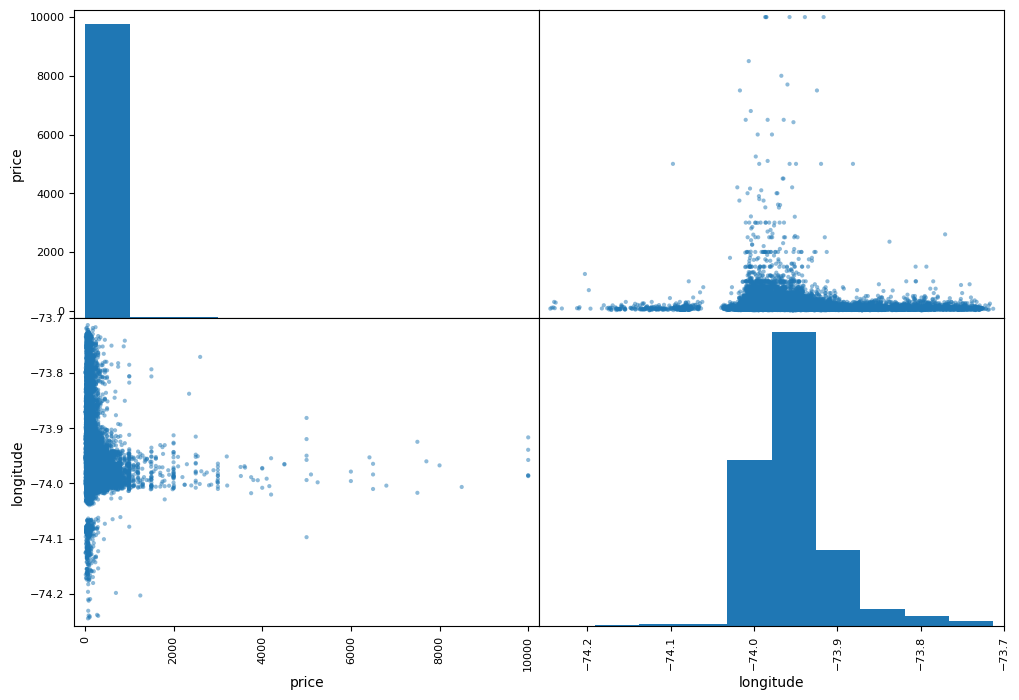

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["price","longitude"]
scatter_matrix(df[attributes], figsize=(12,8))

##Create a Test Set (10 points)
We use 20% of the data for testing and the rest for training. Since neighbourhood_group is an important feature, we use neighbourhood_group to conduct a stratefied split.

Fill in your code below.

In [15]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
strat_test_set["neighbourhood_group"].value_counts()/len(strat_test_set)

,count
neighbourhood_group,
Manhattan,0.441444
Brooklyn,0.412806
Queens,0.114555
Bronx,0.022911
Staten Island,0.008285


In [17]:
df["neighbourhood_group"].value_counts()/len(df)

,count
neighbourhood_group,
Manhattan,0.443090
Brooklyn,0.411075
Queens,0.115907
Bronx,0.022298
Staten Island,0.007630


In [18]:
strat_test_set.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
41309,Manhattan,40.73778,-73.99616,Private room,99,12,4,0.79,4,29
22079,Manhattan,40.79142,-73.94664,Private room,90,2,110,4.04,4,237
18778,Brooklyn,40.71906,-73.94394,Entire home/apt,80,30,10,0.32,8,97
25492,Manhattan,40.84590,-73.94219,Private room,60,1,1,0.04,1,0
44308,Manhattan,40.81249,-73.94175,Private room,90,4,0,NaN,2,365


##Prepare the Data for Machine Learning Algorithms (20 points)
Drop the label from the training and testing sets, and verify that we indeed have dropped it successfully.

In [19]:
housing = strat_train_set.drop("price", axis=1) # drop labels for training set
housing_labels = strat_train_set["price"].copy()

In [20]:
housing.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
44548,Queens,40.70840,-73.78882,Entire home/apt,3,6,3.05,1,37
31352,Brooklyn,40.70343,-73.93412,Private room,5,5,0.35,1,0
42263,Bronx,40.89981,-73.86684,Private room,2,7,1.84,1,70
11756,Manhattan,40.74526,-73.99545,Private room,14,1,0.02,1,0
23349,Brooklyn,40.67075,-73.97690,Private room,1,0,NaN,4,0


In [21]:
housing_labels.head()

,price
44548,64
31352,45
42263,80
11756,140
23349,149


### Data Cleaning

In [22]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23349,Brooklyn,40.67075,-73.97690,Private room,1,0,NaN,4,0
47042,Manhattan,40.75372,-73.97232,Entire home/apt,3,0,NaN,1,51
48468,Manhattan,40.84467,-73.94289,Private room,1,0,NaN,1,12
12292,Brooklyn,40.69914,-73.91471,Entire home/apt,3,0,NaN,1,0
47616,Manhattan,40.79981,-73.95436,Entire home/apt,4,0,NaN,1,13


In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [24]:
housing_num = housing.drop(["neighbourhood_group", "room_type"], axis=1)

In [25]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_

array([ 40.72312, -73.95565,   3.     ,   5.     ,   0.71   ,   1.     ,
        45.     ])

In [27]:
X = imputer.transform(housing_num)

In [28]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns, index=housing_num.index)

In [29]:
housing_tr.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,39107.000000,39107.000000,39107.000000,39107.000000,39107.000000,39107.000000,39107.000000
mean,40.729019,-73.952083,7.110517,23.274503,1.240938,7.120337,113.213389
std,0.054537,0.046085,21.010038,44.588190,1.540482,32.812685,131.846765
min,40.499790,-74.244420,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690035,-73.983030,1.000000,1.000000,0.280000,1.000000,0.000000
50%,40.723120,-73.955650,3.000000,5.000000,0.710000,1.000000,45.000000
75%,40.763245,-73.936190,5.000000,24.000000,1.590000,2.000000,228.000000
max,40.913060,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000


### Handling Text and Categorical Attributes


In [30]:
housing_cat = housing[["neighbourhood_group", "room_type"]]

In [31]:
housing_cat.head(10)

,neighbourhood_group,room_type
44548,Queens,Entire home/apt
31352,Brooklyn,Private room
42263,Bronx,Private room
11756,Manhattan,Private room
23349,Brooklyn,Private room
17609,Brooklyn,Entire home/apt
47042,Manhattan,Entire home/apt
48468,Manhattan,Private room
11168,Manhattan,Entire home/apt
12292,Brooklyn,Entire home/apt


In [32]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [33]:
housing_cat_1hot

<39107x8 sparse matrix of type '<class 'numpy.float64'>'
	with 78214 stored elements in Compressed Sparse Row format>

In [34]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [35]:
housing_cat_1hot.toarray()[0]

array([0., 0., 0., 1., 0., 1., 0., 0.])

In [36]:
housing_cat_1hot.toarray().shape

(39107, 8)

In [37]:
cat_encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object),
 array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]

###Pipleline.
Now we prepare a pipeline that includes two steps: (i) imputing and (ii) scaling.

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Fill in your code below

In [39]:
num_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)


In [40]:
housing_num_tr

array([[-0.37808277,  3.54273116, -0.1956479 , ...,  1.17436304,
        -0.18652588, -0.57805258],
       [-0.46921484,  0.38979428, -0.10045409, ..., -0.57835749,
        -0.18652588, -0.85868498],
       [ 3.13169414,  1.84973642, -0.24324481, ...,  0.38888458,
        -0.18652588, -0.32775883],
       ...,
       [ 3.03726151,  1.18768478, -0.29084172, ...,  0.01237425,
        -0.15604947,  0.9692179 ],
       [ 0.84459068, -0.60360868, -0.24324481, ..., -0.72117175,
        -0.18652588, -0.84351566],
       [ 0.32181894,  0.14176903, -0.10045409, ..., -0.78608733,
        -0.18652588, -0.85868498]])

###Use one hot encoding for categorical data and get the full pipeline
Finally, the prepared data is stored in housing_prepared.

Fill in your code below

In [41]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = list(housing_cat)
print(cat_attribs)
print(num_attribs)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder() ,cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

['neighbourhood_group', 'room_type']
['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [42]:
housing_prepared

array([[-0.37808277,  3.54273116, -0.1956479 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.46921484,  0.38979428, -0.10045409, ...,  0.        ,
         1.        ,  0.        ],
       [ 3.13169414,  1.84973642, -0.24324481, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 3.03726151,  1.18768478, -0.29084172, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.84459068, -0.60360868, -0.24324481, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32181894,  0.14176903, -0.10045409, ...,  1.        ,
         0.        ,  0.        ]])

##Training models (10 points)
We will try two basic models: linear and decision tree first.

###Linear model.

Fill in your code below.

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [44]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
#print(some_data_prepared)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [113.78730826  47.53562195  21.45116875 135.55048101  78.13446943]


In [45]:
print("Labels:", list(some_labels))

Labels: [64, 45, 80, 140, 149]


In [46]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

237.22364039495278

In [47]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

74.4831334684396

RMSE is more sensitive to outliers.
RMSE penalises large errors more than MAE due to the fact that errors are squared initially.
MAE returns values that are more interpretable as it is simply the average of absolute error.

We deiced to use MAE for our problem.

###Decision tree

Fill in your code below.

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [49]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_absolute_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.035756726405864754

## Model fine-tuning (20 points)

###Cross validation (CV).
Use 10-fold CV on the linear model to obtain mae for each fold and the mean mae.

Fill in your code below.

Note your can use

scoring="neg_mean_absolute_error"

In [50]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                                  scoring="neg_mean_absolute_error", cv=10)
tree_mae_scores = -tree_scores
print(tree_scores)

[-80.38660189 -87.54052672 -82.44310918 -90.51546919 -83.06903605
 -91.40603426 -86.07772948 -93.60409207 -95.76086957 -83.7657289 ]


In [51]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_mae_scores)

Scores: [80.38660189 87.54052672 82.44310918 90.51546919 83.06903605 91.40603426
 86.07772948 93.60409207 95.76086957 83.7657289 ]
Mean: 87.4569197312845
Standard deviation: 4.9153718109646976


In [52]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_absolute_error", cv=10)
lin_mae_scores = -lin_scores
display_scores(lin_mae_scores)

Scores: [69.11936121 74.6773895  70.74371226 79.66936271 72.24918879 74.31479549
 75.22710102 75.22591039 81.84410145 72.27277377]
Mean: 74.53436965865549
Standard deviation: 3.672265961250355


### Random forest.
We see from above that the prediction from the linear model is not very good, while the decision tree that we used earlier on leads to overfitting. Now we are going to try an ensemble approach, random forest based regressor.

Fill in your code below.

In [53]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [54]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mae = mean_absolute_error(housing_labels, housing_predictions)
forest_mae

25.32824009098359

In [55]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_absolute_error", cv=10)
forest_mae_scores = -forest_scores
display_scores(forest_mae_scores)

Scores: [61.67627248 66.87297281 62.66588042 75.01143101 64.64604236 67.66512017
 66.34565073 70.50546036 72.19331245 67.07737639]
Mean: 67.46595191722125
Standard deviation: 3.934858650545299


###We see that random forest indeed leads to lower mae than linear model.

In [56]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_absolute_error", cv=10)
pd.Series(-scores).describe()

,0
count,10.000000
mean,74.534370
std,3.870908
min,69.119361
25%,72.255085
50%,74.496092
75%,75.226803
max,81.844101


In [57]:
pd.Series(forest_mae_scores).describe()

,0
count,10.000000
mean,67.465952
std,4.147705
min,61.676272
25%,65.070944
50%,66.975175
75%,69.795375
max,75.011431


In [58]:
pd.Series(tree_mae_scores).describe()

,0
count,10.000000
mean,87.456920
std,5.181257
min,80.386602
25%,83.243209
50%,86.809128
75%,91.183393
max,95.760870


In [59]:
pd.Series(lin_mae_scores).describe()

,0
count,10.000000
mean,74.534370
std,3.870908
min,69.119361
25%,72.255085
50%,74.496092
75%,75.226803
max,81.844101


###Grid search: tuning hyperparameters.
Now we will use grid search to find better parameters.

Fill in your code below.

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30]},
     {'bootstrap': [False], 'max_features': [2, 3, 4], 'n_estimators': [3, 10]}
    ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           return_train_score=True,
                           scoring='neg_mean_absolute_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [61]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [62]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [63]:
cvres = grid_search.cv_results_
print(cvres)

{'mean_fit_time': array([0.30256472, 0.91619873, 1.79333606, 0.27489729, 0.91953945,
       2.55265908, 0.3134738 , 1.21782856, 3.41374178, 0.40487833,
       1.53618069, 4.44559917, 0.23810182, 0.80048771, 0.29420133,
       1.17026911, 0.34245973, 1.15742145]), 'std_fit_time': array([0.08538486, 0.1320981 , 0.22999502, 0.04525038, 0.16321124,
       0.21477707, 0.00581947, 0.18704124, 0.30264106, 0.00849092,
       0.18947145, 0.29942962, 0.00732276, 0.01625634, 0.00436616,
       0.21268058, 0.00612387, 0.00970916]), 'mean_score_time': array([0.01746421, 0.05154653, 0.09299493, 0.01208735, 0.03609533,
       0.0953136 , 0.01088128, 0.0346601 , 0.09612455, 0.01119413,
       0.03551464, 0.1013371 , 0.01239882, 0.03800788, 0.012466  ,
       0.04110112, 0.01240578, 0.03828421]), 'std_score_time': array([0.00591369, 0.02656923, 0.00058583, 0.00108508, 0.00573371,
       0.00446682, 0.00022366, 0.00282677, 0.00566101, 0.00039846,
       0.00389494, 0.00649327, 0.00028353, 0.00077705, 0.

In [64]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

75.54181031618864 {'max_features': 2, 'n_estimators': 3}
68.8603997422055 {'max_features': 2, 'n_estimators': 10}
66.4088670262028 {'max_features': 2, 'n_estimators': 30}
75.39034773006821 {'max_features': 4, 'n_estimators': 3}
69.7992422467759 {'max_features': 4, 'n_estimators': 10}
66.75268010946323 {'max_features': 4, 'n_estimators': 30}
75.87737921363883 {'max_features': 6, 'n_estimators': 3}
70.23857877804656 {'max_features': 6, 'n_estimators': 10}
67.760587399262 {'max_features': 6, 'n_estimators': 30}
75.30889520699448 {'max_features': 8, 'n_estimators': 3}
70.3102730615113 {'max_features': 8, 'n_estimators': 10}
68.14093476763034 {'max_features': 8, 'n_estimators': 30}
73.99092552723927 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
68.4502392991264 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
74.9846206629667 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
69.15158889786241 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
75.804

In [65]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.302565,0.085385,0.017464,0.005914,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-71.026890,-77.480695,...,-75.541810,2.535736,16,-31.258889,-31.035651,-29.591664,-30.515790,-29.317895,-30.343978,0.769911
1,0.916199,0.132098,0.051547,0.026569,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-65.302525,-71.425556,...,-68.860400,2.137099,6,-28.139877,-27.739553,-26.975833,-27.333931,-26.489512,-27.335741,0.575385
2,1.793336,0.229995,0.092995,0.000586,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-63.921273,-67.937000,...,-66.408867,1.598382,1,-25.502266,-25.274200,-25.309047,-25.188635,-24.443201,-25.143470,0.364872
3,0.274897,0.045250,0.012087,0.001085,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-73.738387,-74.713628,...,-75.390348,1.567991,15,-31.275318,-31.294891,-30.834846,-30.538505,-29.626230,-30.713958,0.613377
4,0.919539,0.163211,0.036095,0.005734,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-68.467182,-71.131424,...,-69.799242,1.211175,9,-28.113591,-27.505392,-28.041165,-27.688091,-27.080524,-27.685753,0.376351
5,2.552659,0.214777,0.095314,0.004467,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-65.277378,-67.833608,...,-66.752680,1.039162,2,-25.831816,-25.302298,-25.996151,-25.653796,-24.724402,-25.501693,0.451784
6,0.313474,0.005819,0.010881,0.000224,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-71.775590,-75.357879,...,-75.877379,2.550613,18,-30.956049,-30.898876,-31.083110,-31.645241,-30.381516,-30.992958,0.404395
7,1.217829,0.187041,0.034660,0.002827,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-66.746190,-71.711647,...,-70.238579,1.824134,10,-27.948621,-28.148876,-28.101849,-28.099188,-27.465552,-27.952817,0.252792
8,3.413742,0.302641,0.096125,0.005661,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-65.067868,-68.416645,...,-67.760587,1.497234,3,-25.889184,-25.494562,-25.945807,-25.811996,-24.909411,-25.610192,0.383579
9,0.404878,0.008491,0.011194,0.000398,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-72.797793,-76.299582,...,-75.308895,1.309698,14,-32.879591,-30.914911,-31.108174,-30.569818,-29.493575,-30.993214,1.095988


###Now we will use randomized search.

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fdb080d51b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fdb080d50f0>},
                   random_state=42, scoring='neg_mean_absolute_error')

In [67]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

65.99474129918782 {'max_features': 7, 'n_estimators': 180}
68.94056689307266 {'max_features': 5, 'n_estimators': 15}
65.39220512614477 {'max_features': 3, 'n_estimators': 72}
68.0844428561837 {'max_features': 5, 'n_estimators': 21}
66.25168897713232 {'max_features': 7, 'n_estimators': 122}
65.33476353328948 {'max_features': 3, 'n_estimators': 75}
65.22234458466126 {'max_features': 3, 'n_estimators': 88}
65.88061130943785 {'max_features': 5, 'n_estimators': 100}
64.8097498415818 {'max_features': 3, 'n_estimators': 150}
78.99224628708251 {'max_features': 5, 'n_estimators': 2}


It turns out that the random search obtains better results than the grid search.

We can find the relative importance of each attribute for making accurate predictions:

In [68]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.23417044, 0.25571515, 0.11470074, 0.05551533, 0.07150965,
       0.05801494, 0.13015651, 0.00061592, 0.00501805, 0.01108196,
       0.00424775, 0.00099804, 0.03249688, 0.02366968, 0.00208895])

Let's display the importance scores next to their corresponding attribute names:

In [69]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0]) + list(cat_encoder.categories_[1])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.255715154412206, 'longitude'),
 (0.23417043565647255, 'latitude'),
 (0.13015650614758084, 'availability_365'),
 (0.11470074441466345, 'minimum_nights'),
 (0.07150964956271276, 'reviews_per_month'),
 (0.05801494284845121, 'calculated_host_listings_count'),
 (0.05551532710032453, 'number_of_reviews'),
 (0.03249688187755389, 'Entire home/apt'),
 (0.023669681867960854, 'Private room'),
 (0.011081960215362379, 'Manhattan'),
 (0.005018051325088616, 'Brooklyn'),
 (0.004247751718708156, 'Queens'),
 (0.0020889546398316144, 'Shared room'),
 (0.000998039772843117, 'Staten Island'),
 (0.0006159184402401777, 'Bronx')]

##Evaluate model on the Test Set (10 points)

Fill in your code below.

In [70]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mae = mean_absolute_error(y_test, final_predictions)

In [71]:
final_mae

64.07826361187821

Let's have some more detailed look at the predictions. First we look at the differences.

In [72]:
diff = final_predictions - y_test

In [73]:
pd.Series(diff).describe()

,price
count,9777.000000
mean,0.617038
std,179.204601
min,-6410.200000
25%,-12.600000
50%,11.866667
75%,39.000000
max,2328.766667


<Axes: >

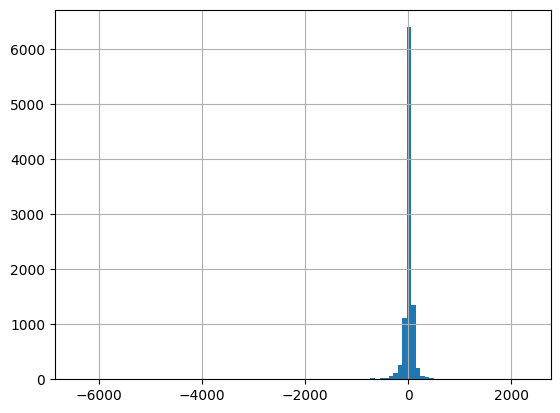

In [74]:
pd.Series(diff).hist(bins=100)

Next, we obtain the 95% of the middle predictions and examine them.

In [75]:
import pandas as pd

# Step 1: Sort the Series
sorted_series = pd.Series(diff).sort_values()

# Step 2: Calculate the start and end indices for the middle 95 percent
total_elements = len(sorted_series)
start_index = int(total_elements * 0.025)  # Start index of the middle 95%
end_index = int(total_elements * 0.975)    # End index of the middle 95%

# Step 3: Slice the Series to get the middle 95 percent of data
middle_95_percent_data = sorted_series[start_index:end_index]

middle_95_percent_data.describe()


,price
count,9288.000000
mean,9.925034
std,57.482262
min,-234.600000
25%,-10.933333
50%,11.850000
75%,37.175000
max,175.300000


<Axes: >

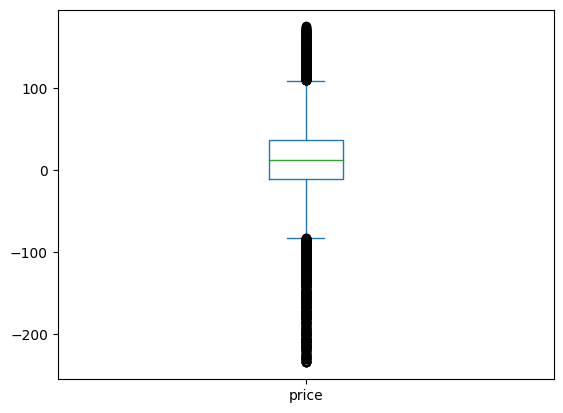

In [76]:
middle_95_percent_data.plot.box()

Next, we look at the absolute diffrences. We can see that most of time, the errors are within 29 dollars.

In [77]:
abs(middle_95_percent_data).describe()

,price
count,9288.000000
mean,40.995972
std,41.495503
min,0.000000
25%,11.466667
50%,26.783333
75%,56.716667
max,234.600000


<Axes: >

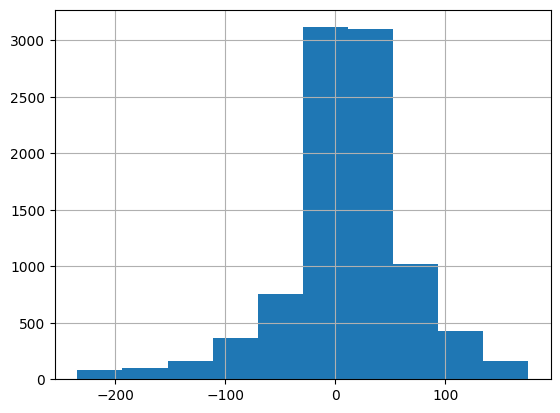

In [78]:
middle_95_percent_data.hist()